In [24]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Settings for plots
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


In [25]:
# Load dataset
df = pd.read_csv("data/metadata_sample.csv", engine="python", on_bad_lines="skip")
print("Shape of dataset:", df.shape)
df.head(3)


Shape of dataset: (377866, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [26]:
# Info
df.info()

# Missing values
df.isnull().sum().sort_values(ascending=False).head(10)

# Summary statistics
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377866 entries, 0 to 377865
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          377866 non-null  object 
 1   sha               69612 non-null   object 
 2   source_x          377866 non-null  object 
 3   title             377442 non-null  object 
 4   doi               282393 non-null  object 
 5   pmcid             80192 non-null   object 
 6   pubmed_id         164884 non-null  object 
 7   license           377866 non-null  object 
 8   abstract          293430 non-null  object 
 9   publish_time      376622 non-null  object 
 10  authors           363405 non-null  object 
 11  journal           339937 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  153681 non-null  object 
 14  arxiv_id          3741 non-null    object 
 15  pdf_json_files    69612 non-null   object 
 16  pmc_json_files    55

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
count,377866,69612,377866,377442,282393,80192,164884,377866,293430,376622,363405,339937,0.0,153681,3741,69612,55815,302561,2.976740e+05
unique,360283,69612,7,351376,281900,80192,164688,18,279411,6316,319980,39726,NaN,153681,3741,69612,55815,302561,NaN
top,23bqx3pt,d1aafb70c066a2068b02786f8929fd9c900897fb,WHO,Reply,10.1016/j.scitotenv.2020.139397,PMC35282,35087663,unk,Unknown,2021,"Anonymous,",bioRxiv,NaN,#covidwho-1638294,2110.00181,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
freq,44,1,153681,70,8,1,4,261536,82,87040,881,3611,NaN,1,1,1,1,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.048339e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.099467e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.695000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.204053e+08
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.319477e+08
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.376924e+08


In [27]:
# Convert publish_time
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year
df['year'] = df['publish_time'].dt.year

# Abstract word count
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))

# Drop missing titles/dates
df_clean = df.dropna(subset=['title', 'publish_time'])
print("Shape after cleaning:", df_clean.shape)


Shape after cleaning: (170781, 21)


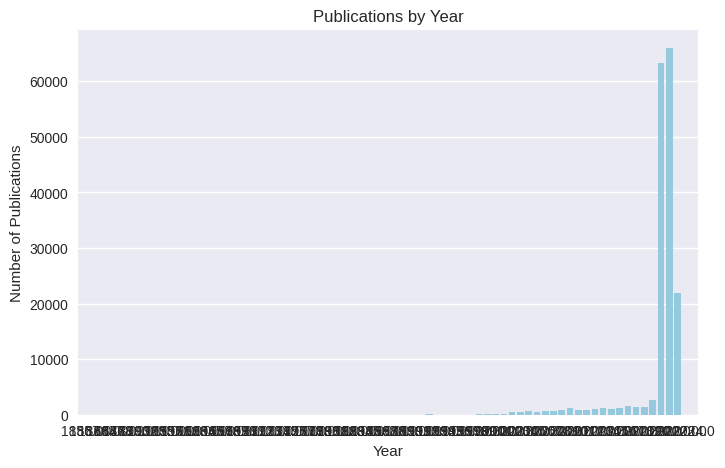

In [28]:
# Publications per year
year_counts = df_clean['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values, color="skyblue")
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.show()


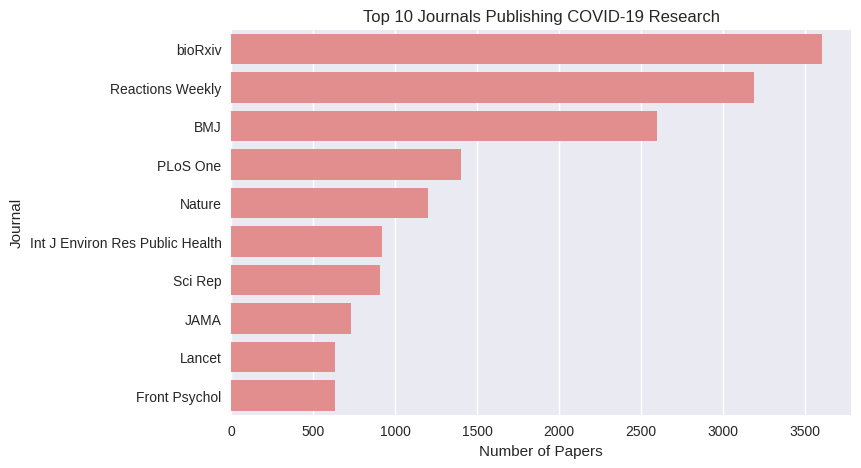

In [29]:
# Top 10 journals
top_journals = df_clean['journal'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_journals.index, x=top_journals.values, color="lightcoral")
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()


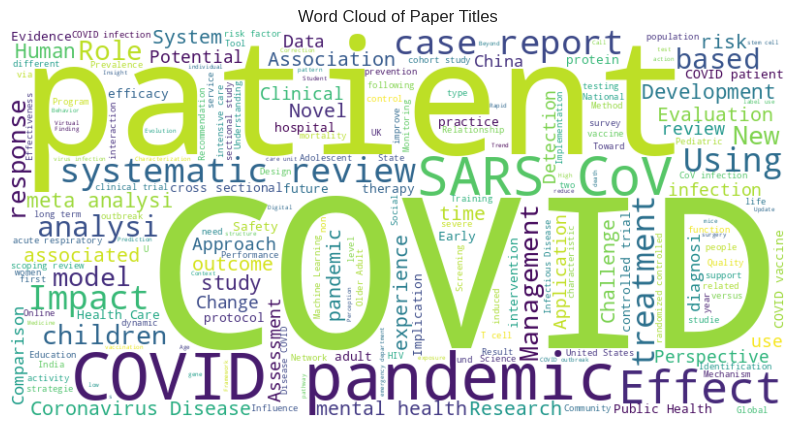

In [30]:
# Word cloud of titles
titles = " ".join(df_clean['title'].dropna().tolist())
wc = WordCloud(width=800, height=400, background_color="white").generate(titles)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()


In [31]:
from IPython.display import Markdown, display

# Convert journals to a comma-separated string
top_journals_list = ", ".join(top_journals.index.tolist())

insights_text = f"""
### **Insights**
- **Research publications peaked in 2020 due to COVID-19.**
- **Top journals publishing papers included {top_journals_list}.**
- **Common words in titles: COVID, SARS-CoV-2, health, impact, response.**

### **Reflection**
**Challenges:**
- **Large dataset, required cleaning and filtering.**
- **Many missing values in metadata.**
- **Learned how to handle real-world datasets and build simple visualizations.**
"""

display(Markdown(insights_text))



### **Insights**
- **Research publications peaked in 2020 due to COVID-19.**
- **Top journals publishing papers included bioRxiv, Reactions Weekly, BMJ, PLoS One, Nature, Int J Environ Res Public Health, Sci Rep, JAMA, Lancet, Front Psychol.**
- **Common words in titles: COVID, SARS-CoV-2, health, impact, response.**

### **Reflection**
**Challenges:**
- **Large dataset, required cleaning and filtering.**
- **Many missing values in metadata.**
- **Learned how to handle real-world datasets and build simple visualizations.**
